In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [3]:
ls

Explore Multi-Label Classification with an Enzyme Substrate Dataset.ipynb
mixed_desc.csv
mixed_ecfp.csv
mixed_fcfp.csv
sample_submission.csv
test.csv
train.csv


In [4]:
mx1 = pd.read_csv('mixed_desc.csv')
mx2 = pd.read_csv('mixed_ecfp.csv')
mx3 = pd.read_csv('mixed_fcfp.csv')

In [5]:
mx1

,CIDs,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,EC1_EC2_EC3_EC4_EC5_EC6
0,C00009,8.881944,-4.638889,8.881944,4.638889,0.341891,97.994,94.970,97.976895,32,...,0,0,0,0,0,0,0,0,0,1_1_1_1_0_1
1,C00013,9.626875,-5.050347,9.626875,2.958333,0.407078,177.973,173.941,177.943226,56,...,0,0,0,0,0,0,0,0,0,1_1_1_1_0_1
2,C00014,0.000000,0.000000,0.000000,0.000000,0.397555,17.031,14.007,17.026549,8,...,0,0,0,0,0,0,0,0,0,1_1_1_1_0_1
3,C00017,10.860741,-0.931481,10.860741,0.215832,0.407584,130.103,124.055,130.037842,50,...,0,0,0,0,0,0,0,0,0,0_1_1_0_0_0
4,C00022,9.543981,-1.379630,9.543981,0.824074,0.445928,88.062,84.030,88.016044,34,...,0,0,0,0,0,0,0,0,0,1_1_1_1_0_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,C22158,4.750000,0.250000,4.750000,0.250000,0.371490,16.023,14.007,16.018724,7,...,0,0,0,0,0,0,0,0,0,0_1_0_0_0_1
1035,C22169,13.516859,-0.727746,13.516859,0.138810,0.536654,405.458,382.274,405.180090,154,...,0,0,0,0,0,0,0,0,0,1_1_0_0_0_0
1036,C22180,13.606147,-2.044178,13.606147,0.276604,0.060282,831.693,794.397,831.197041,316,...,0,0,0,0,0,0,0,0,0,0_1_1_0_0_0
1037,C22181,13.774221,-2.149645,13.774221,0.322613,0.051119,993.834,946.458,993.249864,380,...,0,0,0,0,0,0,0,0,0,0_1_1_0_0_0


In [6]:
print(mx1.columns)

Index(['CIDs', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons',
       ...
       'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'EC1_EC2_EC3_EC4_EC5_EC6'],
      dtype='object', length=198)


In [7]:
cols=df.columns

In [8]:
cols

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

In [9]:
mx1[['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2']]

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,49.783540,2.000000,0.782574,2.347723,0.513277,1.539831,0.000000,0.000000,7.822697,0.000000,...,7.822697,0.000000,0.000000,0.000000,7.822697,0.000000,4.565048,16.923611,0,0
1,147.355172,3.707107,1.530297,4.590890,1.062804,3.678309,1.914534,0.138556,15.645394,0.000000,...,15.645394,0.000000,0.000000,0.000000,15.645394,0.000000,13.440728,20.899028,0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.150546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,172.720106,4.947265,2.081214,2.081214,1.157830,1.157830,0.489278,0.180980,12.514062,12.451936,...,50.712056,0.000000,0.000000,0.000000,11.876485,13.089513,9.589074,35.105740,1,1
4,72.039100,2.642734,1.381855,1.381855,0.861339,0.861339,0.301176,0.000000,11.752550,0.000000,...,5.969305,0.000000,0.000000,6.923737,11.752550,6.923737,9.589074,25.333333,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.150546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,0,0
1035,1089.952436,14.314516,9.868666,9.868666,8.606229,8.606229,6.915649,5.276218,23.037597,17.511399,...,0.000000,38.122596,29.541651,11.611834,23.577766,37.890903,15.004065,71.666667,0,0
1036,2063.210735,27.923738,17.236799,17.236799,13.000558,13.000558,9.042567,5.796537,161.889763,5.563451,...,17.907916,12.132734,41.961654,0.000000,35.629455,48.645354,33.331063,182.833333,0,0
1037,2381.323662,33.070804,20.739969,20.739969,16.012936,16.012936,11.360774,7.437345,199.016477,11.126903,...,17.907916,6.066367,47.525105,0.000000,35.629455,79.165186,38.067926,218.166667,0,0


In [10]:
mx1['EC1_EC2_EC3_EC4_EC5_EC6'][0].split('_')[0]

'1'

In [11]:
mx1['EC1'] = mx1['EC1_EC2_EC3_EC4_EC5_EC6'].apply(lambda x: int(x.split('_')[0]))
mx1['EC2'] = mx1['EC1_EC2_EC3_EC4_EC5_EC6'].apply(lambda x: int(x.split('_')[1]))

In [12]:
mx1.drop(['EC1_EC2_EC3_EC4_EC5_EC6',],1,  inplace=True)
df.drop(['id','EC3', 'EC4', 'EC5', 'EC6' ], 1, inplace=True)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_1786/1659686077.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mx1.drop(['EC1_EC2_EC3_EC4_EC5_EC6',],1,  inplace=True)
/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_1786/1659686077.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id','EC3', 'EC4', 'EC5', 'EC6' ], 1, inplace=True)


In [13]:
df.columns

Index(['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n',
       'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2'],
      dtype='object')

In [14]:
mx1 = mx1[['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n',
       'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2']]

In [15]:
df_fin = pd.concat([df, mx1])

In [16]:
df_fin

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,0,0,0,1
1035,1089.952436,14.314516,9.868666,9.868666,8.606229,8.606229,6.915649,5.276218,23.037597,17.511399,...,29.541651,11.611834,23.577766,37.890903,15.004065,71.666667,0,0,1,1
1036,2063.210735,27.923738,17.236799,17.236799,13.000558,13.000558,9.042567,5.796537,161.889763,5.563451,...,41.961654,0.000000,35.629455,48.645354,33.331063,182.833333,0,0,0,1
1037,2381.323662,33.070804,20.739969,20.739969,16.012936,16.012936,11.360774,7.437345,199.016477,11.126903,...,47.525105,0.000000,35.629455,79.165186,38.067926,218.166667,0,0,0,1


In [17]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15877 entries, 0 to 1038
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            15877 non-null  float64
 1   Chi1               15877 non-null  float64
 2   Chi1n              15877 non-null  float64
 3   Chi1v              15877 non-null  float64
 4   Chi2n              15877 non-null  float64
 5   Chi2v              15877 non-null  float64
 6   Chi3v              15877 non-null  float64
 7   Chi4n              15877 non-null  float64
 8   EState_VSA1        15877 non-null  float64
 9   EState_VSA2        15877 non-null  float64
 10  ExactMolWt         15877 non-null  float64
 11  FpDensityMorgan1   15877 non-null  float64
 12  FpDensityMorgan2   15877 non-null  float64
 13  FpDensityMorgan3   15877 non-null  float64
 14  HallKierAlpha      15877 non-null  float64
 15  HeavyAtomMolWt     15877 non-null  float64
 16  Kappa3             1587

In [18]:
df_fin.drop_duplicates()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,347.055592,6.502908,3.921654,3.921654,2.881226,2.881226,1.753937,1.006554,12.073272,17.919845,...,17.696186,6.420822,5.969305,12.524788,11.215359,46.500000,1,1,1,1
1035,1089.952436,14.314516,9.868666,9.868666,8.606229,8.606229,6.915649,5.276218,23.037597,17.511399,...,29.541651,11.611834,23.577766,37.890903,15.004065,71.666667,0,0,1,1
1036,2063.210735,27.923738,17.236799,17.236799,13.000558,13.000558,9.042567,5.796537,161.889763,5.563451,...,41.961654,0.000000,35.629455,48.645354,33.331063,182.833333,0,0,0,1
1037,2381.323662,33.070804,20.739969,20.739969,16.012936,16.012936,11.360774,7.437345,199.016477,11.126903,...,47.525105,0.000000,35.629455,79.165186,38.067926,218.166667,0,0,0,1


In [19]:
df_fin.drop_duplicates(inplace=True)

In [20]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15805 entries, 0 to 1038
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            15805 non-null  float64
 1   Chi1               15805 non-null  float64
 2   Chi1n              15805 non-null  float64
 3   Chi1v              15805 non-null  float64
 4   Chi2n              15805 non-null  float64
 5   Chi2v              15805 non-null  float64
 6   Chi3v              15805 non-null  float64
 7   Chi4n              15805 non-null  float64
 8   EState_VSA1        15805 non-null  float64
 9   EState_VSA2        15805 non-null  float64
 10  ExactMolWt         15805 non-null  float64
 11  FpDensityMorgan1   15805 non-null  float64
 12  FpDensityMorgan2   15805 non-null  float64
 13  FpDensityMorgan3   15805 non-null  float64
 14  HallKierAlpha      15805 non-null  float64
 15  HeavyAtomMolWt     15805 non-null  float64
 16  Kappa3             1580

In [21]:
df_fin

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,347.055592,6.502908,3.921654,3.921654,2.881226,2.881226,1.753937,1.006554,12.073272,17.919845,...,17.696186,6.420822,5.969305,12.524788,11.215359,46.500000,1,1,1,1
1035,1089.952436,14.314516,9.868666,9.868666,8.606229,8.606229,6.915649,5.276218,23.037597,17.511399,...,29.541651,11.611834,23.577766,37.890903,15.004065,71.666667,0,0,1,1
1036,2063.210735,27.923738,17.236799,17.236799,13.000558,13.000558,9.042567,5.796537,161.889763,5.563451,...,41.961654,0.000000,35.629455,48.645354,33.331063,182.833333,0,0,0,1
1037,2381.323662,33.070804,20.739969,20.739969,16.012936,16.012936,11.360774,7.437345,199.016477,11.126903,...,47.525105,0.000000,35.629455,79.165186,38.067926,218.166667,0,0,0,1


In [22]:
df_float = df_fin.select_dtypes('float64')

In [23]:
df_float

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.171585,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,-4.830450,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,-5.066255,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,-5.276575,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,-1.676296,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,347.055592,6.502908,3.921654,3.921654,2.881226,2.881226,1.753937,1.006554,12.073272,17.919845,...,-1.500979,0.000000,5.969305,6.066367,17.696186,6.420822,5.969305,12.524788,11.215359,46.500000
1035,1089.952436,14.314516,9.868666,9.868666,8.606229,8.606229,6.915649,5.276218,23.037597,17.511399,...,-0.727746,17.904656,0.000000,38.122596,29.541651,11.611834,23.577766,37.890903,15.004065,71.666667
1036,2063.210735,27.923738,17.236799,17.236799,13.000558,13.000558,9.042567,5.796537,161.889763,5.563451,...,-2.044178,50.340478,17.907916,12.132734,41.961654,0.000000,35.629455,48.645354,33.331063,182.833333
1037,2381.323662,33.070804,20.739969,20.739969,16.012936,16.012936,11.360774,7.437345,199.016477,11.126903,...,-2.149645,80.860310,17.907916,6.066367,47.525105,0.000000,35.629455,79.165186,38.067926,218.166667


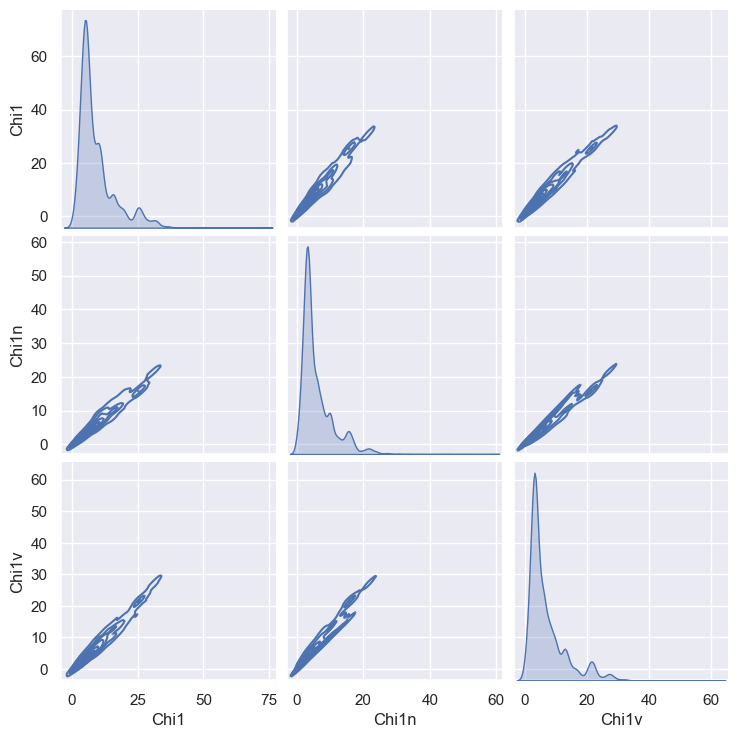

In [25]:

import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.set(rc={'figure.figsize':(15, 15)})  # Adjust the figure size if needed

# Create a matrix of KDE plots
sns.pairplot(df_float[ ['Chi1', 'Chi1n', 'Chi1v', ]
       ], kind="kde", diag_kind="kde")

# Show the plot
plt.show()


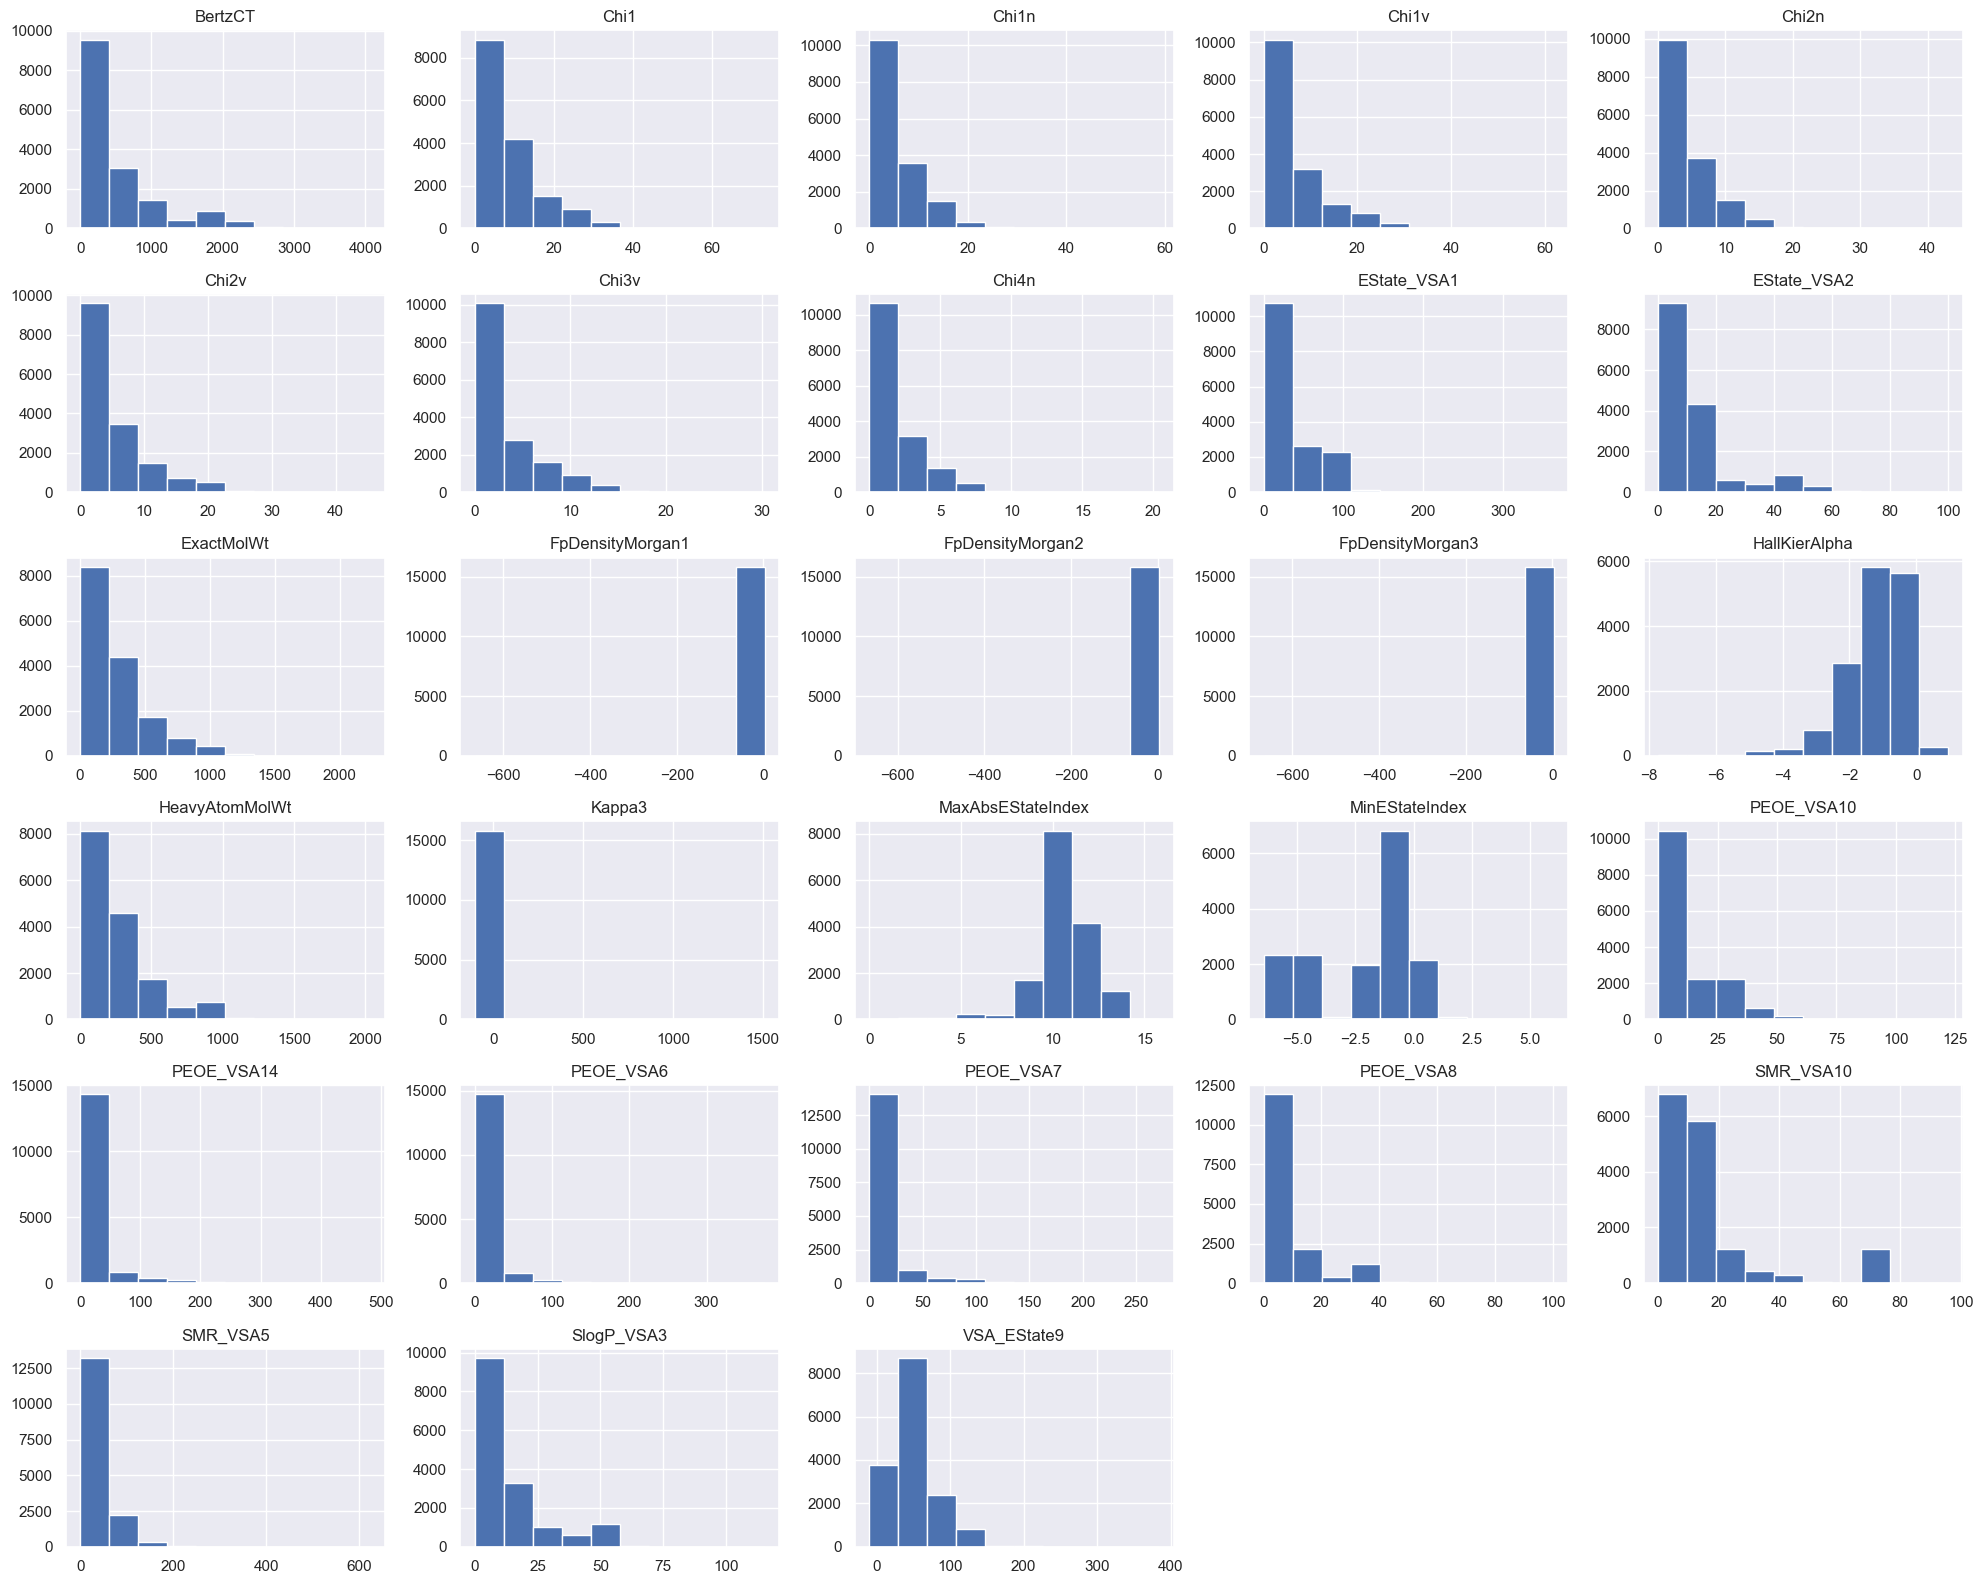

In [32]:
df_float.columns

Index(['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n',
       'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
       'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9'],
      dtype='object')

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  

df_float_normalized = pd.DataFrame(scaler.fit_transform(df_float), columns=df_float.columns)



In [34]:
df_float_normalized

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9
0,0.079458,0.134846,0.099841,0.094905,0.100001,0.094754,0.090823,0.085719,0.000000,0.119459,...,0.530984,0.000000,0.189739,0.000000,0.000000,0.000000,0.185173,0.000000,0.041545,0.115490
1,0.067255,0.099075,0.075472,0.094249,0.076313,0.098726,0.072584,0.063205,0.124099,0.000000,...,0.128468,0.200102,0.016215,0.000000,0.000000,0.000000,0.081636,0.049187,0.119800,0.138761
2,0.128169,0.148923,0.144910,0.178499,0.154837,0.209542,0.192058,0.086766,0.043017,0.066111,...,0.109493,0.000000,0.032430,0.000000,0.196660,0.000000,0.163272,0.117167,0.155663,0.141176
3,0.139419,0.169970,0.120462,0.207297,0.150487,0.241644,0.260960,0.150306,0.262958,0.000000,...,0.092568,0.350178,0.044224,0.000000,0.000000,0.063985,0.163272,0.099488,0.276952,0.247264
4,0.027708,0.060254,0.048705,0.046297,0.043572,0.041285,0.034174,0.035659,0.049437,0.128498,...,0.382284,0.049516,0.024747,0.018442,0.071425,0.000000,0.124588,0.030249,0.083090,0.109928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15800,0.085272,0.088755,0.066639,0.063345,0.066932,0.063420,0.057831,0.049326,0.033195,0.179312,...,0.396392,0.000000,0.012373,0.016159,0.065198,0.063985,0.062294,0.020063,0.097182,0.143305
15801,0.267804,0.195372,0.167694,0.159404,0.199926,0.189435,0.228025,0.258559,0.063341,0.175225,...,0.458615,0.146739,0.000000,0.101545,0.108839,0.115715,0.246052,0.060697,0.130011,0.207102
15802,0.506936,0.381118,0.292897,0.278418,0.302007,0.286160,0.298154,0.284057,0.445112,0.055670,...,0.352681,0.412569,0.037120,0.032317,0.154598,0.000000,0.371820,0.077924,0.288815,0.488906
15803,0.585098,0.451367,0.352425,0.335003,0.371986,0.352466,0.374591,0.364464,0.547191,0.111340,...,0.344194,0.662696,0.037120,0.016159,0.175095,0.000000,0.371820,0.126813,0.329860,0.578475


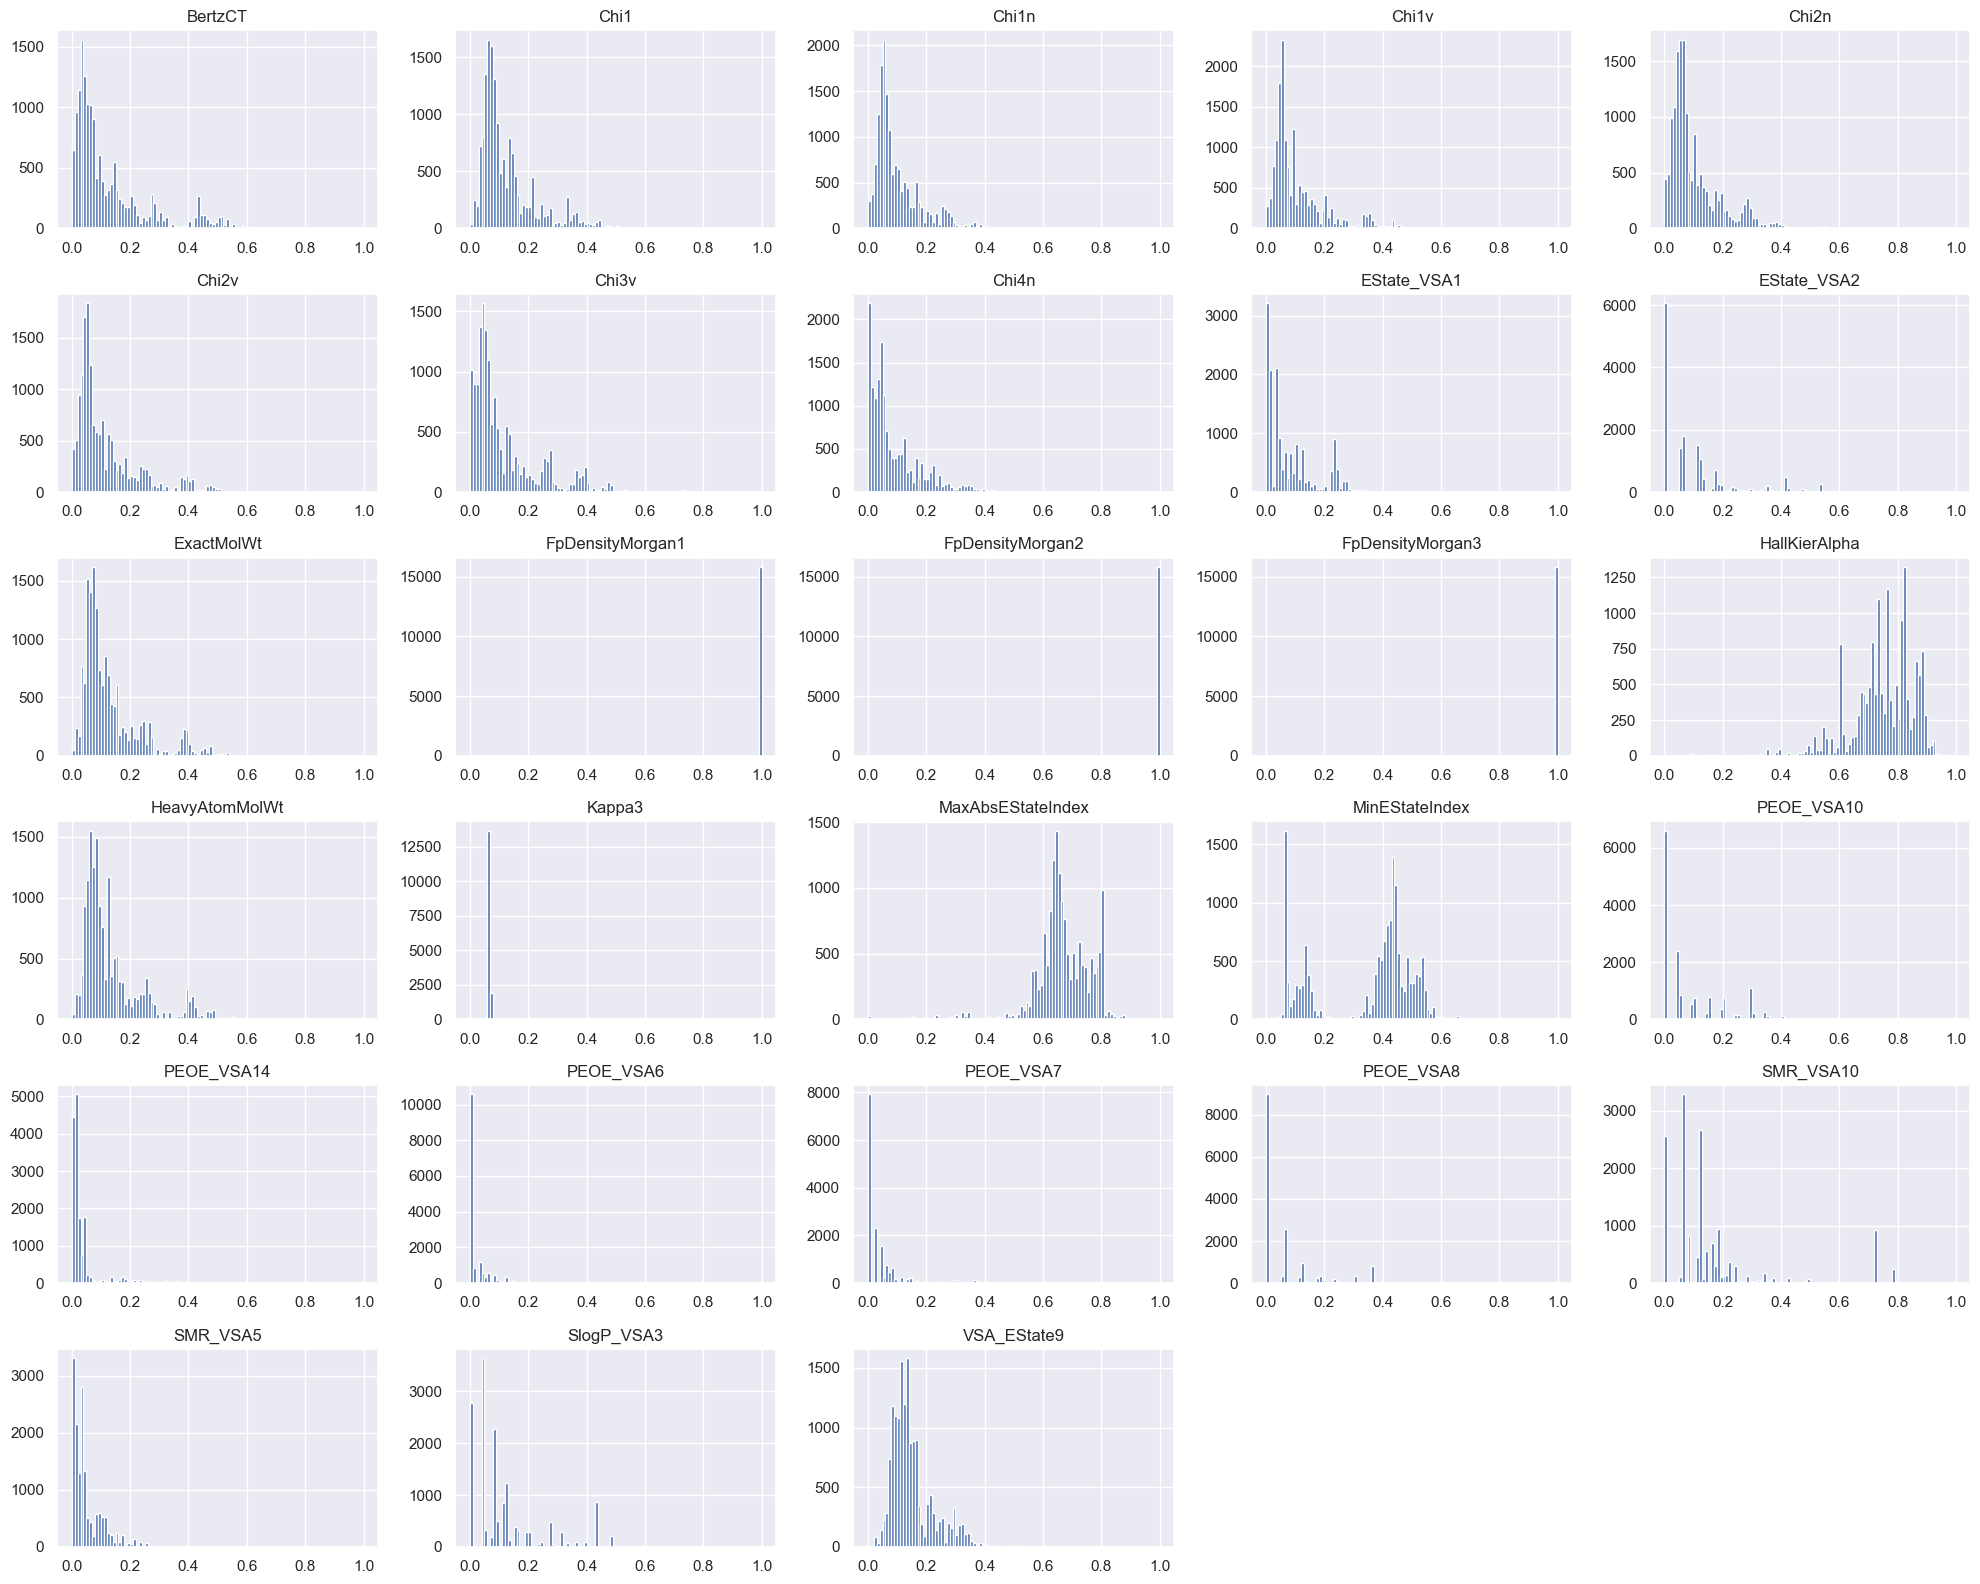

In [38]:
sns.set(style="ticks")
sns.set_palette("husl")
sns.set(rc={'figure.figsize':(20, 16)})  
df_float_normalized.hist(bins=100) 
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histograms of All Columns")
plt.tight_layout()
plt.show()

In [48]:
from sklearn.feature_selection import VarianceThreshold

# Assuming X is your feature matrix
selector = VarianceThreshold()  # Set the threshold as per your requirement
X_selected = selector.fit_transform(df_float_normalized)
selected_columns = df_float_normalized.columns[selector.get_support()]
selected_columns

Index(['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n',
       'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
       'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9'],
      dtype='object')

In [49]:
len(selected_columns)

28

In [45]:
X_selected = pd.DataFrame(X_selected, columns=df_float_normalized.columns)
X_selected

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.171585,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,-4.830450,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,-5.066255,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,-5.276575,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,-1.676296,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15800,347.055592,6.502908,3.921654,3.921654,2.881226,2.881226,1.753937,1.006554,12.073272,17.919845,...,-1.500979,0.000000,5.969305,6.066367,17.696186,6.420822,5.969305,12.524788,11.215359,46.500000
15801,1089.952436,14.314516,9.868666,9.868666,8.606229,8.606229,6.915649,5.276218,23.037597,17.511399,...,-0.727746,17.904656,0.000000,38.122596,29.541651,11.611834,23.577766,37.890903,15.004065,71.666667
15802,2063.210735,27.923738,17.236799,17.236799,13.000558,13.000558,9.042567,5.796537,161.889763,5.563451,...,-2.044178,50.340478,17.907916,12.132734,41.961654,0.000000,35.629455,48.645354,33.331063,182.833333
15803,2381.323662,33.070804,20.739969,20.739969,16.012936,16.012936,11.360774,7.437345,199.016477,11.126903,...,-2.149645,80.860310,17.907916,6.066367,47.525105,0.000000,35.629455,79.165186,38.067926,218.166667
